In [ ]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sales_data = pd.read_csv('MLs09b SalesData.csv');
sales_data

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [ ]:
sales_data.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [ ]:
sales_data.tail(10)

,Temperature,Revenue
490,23.824922,584.399945
491,34.472169,809.352519
492,23.056214,552.819351
493,14.931506,377.430928
494,25.112066,571.434257
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [ ]:
sales_data.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


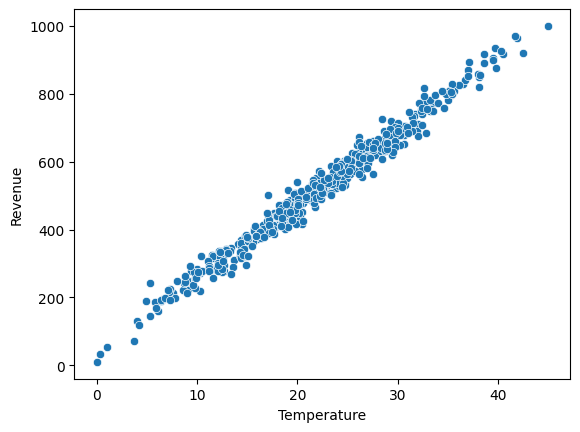

In [ ]:
sns.scatterplot(x=sales_data['Temperature'], y=sales_data['Revenue']);

In [ ]:
x_train = sales_data['Temperature']
y_train = sales_data['Revenue']

In [ ]:
x_train.shape

(500,)

In [ ]:
y_train.shape

(500,)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=5, input_shape = [1]))
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 5)                 10        
                                                                 
Total params: 10 (40.00 Byte)
Trainable params: 10 (40.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss="mean_squared_error")
epochs_hist = model.fit(x_train, y_train, epochs=30)

Epoch 1/30
16/16 [==============================] - 0s 2ms/step - loss: 288399.6562
Epoch 2/30
16/16 [==============================] - 0s 2ms/step - loss: 248183.6562
Epoch 3/30
16/16 [==============================] - 0s 2ms/step - loss: 211962.3594
Epoch 4/30
16/16 [==============================] - 0s 1ms/step - loss: 179713.0625
Epoch 5/30
16/16 [==============================] - 0s 2ms/step - loss: 151737.6406
Epoch 6/30
16/16 [==============================] - 0s 2ms/step - loss: 126804.7031
Epoch 7/30
16/16 [==============================] - 0s 1ms/step - loss: 105620.8281
Epoch 8/30
16/16 [==============================] - 0s 2ms/step - loss: 87275.0938
Epoch 9/30
16/16 [==============================] - 0s 2ms/step - loss: 71449.4141
Epoch 10/30
16/16 [==============================] - 0s 2ms/step - loss: 58178.9062
Epoch 11/30
16/16 [==============================] - 0s 1ms/step - loss: 46951.0391
Epoch 12/30
16/16 [==============================] - 0s 2ms/step - loss: 37765

In [ ]:
epochs_hist.history

{'loss': [288399.65625,
  248183.65625,
  211962.359375,
  179713.0625,
  151737.640625,
  126804.703125,
  105620.828125,
  87275.09375,
  71449.4140625,
  58178.90625,
  46951.0390625,
  37765.0390625,
  30018.0625,
  23705.6171875,
  18628.0,
  14549.3642578125,
  11286.0146484375,
  8764.0859375,
  6747.05859375,
  5205.197265625,
  4019.8544921875,
  3124.856201171875,
  2450.096435546875,
  1953.732666015625,
  1584.9613037109375,
  1319.14599609375,
  1126.3323974609375,
  990.9716186523438,
  891.4197998046875,
  822.592529296875]}

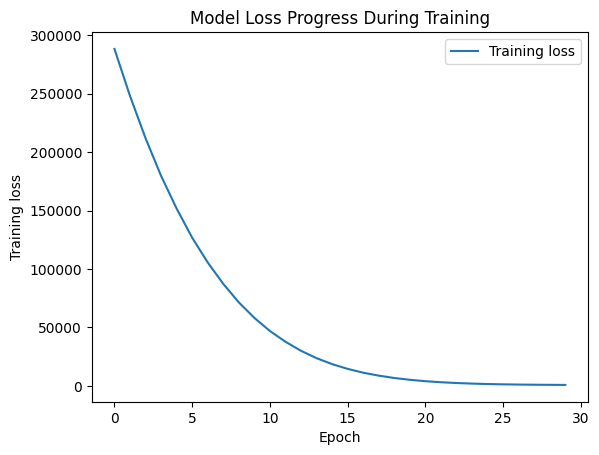

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.legend(['Training loss']);

In [ ]:
model.get_weights()

[array([[21.969694, 21.792027, 22.057539, 21.885162, 21.76125 ]],
       dtype=float32),
 array([22.073143, 22.900251, 21.596613, 22.486279, 23.028952],
       dtype=float32)]

In [ ]:
temp = 20
predict = model.predict([temp])
predict

1/1 [==============================] - 0s 68ms/step


array([[461.46704, 458.74075, 462.7474 , 460.1895 , 458.25394]],
      dtype=float32)